# Modify and explore dataset into a single dataset and attempt to add difference of years column
##

### Import Packages

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib
import plotly.figure_factory as ff
from IPython.core.display import display
from scipy import stats

# pd.set_option('display.max_columns', None)
# pd.reset_option('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

In [81]:
# define useful function to create scatterplots of target feature against desired columns
def scatterplots(df, target, columns, ncol=None, figsize=(20, 25)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.7, hspace=0.7)
    for i, col in enumerate(columns):
        # ax = axes.flatten()[i]
        # ax.scatter(x = col, y = target, data=df, alpha=0.5)
        sns.regplot(ax=axes.flatten()[i], x=col, y=target, data=df, scatter_kws={'alpha':0.5})
        # ax.set(xlabel=col, ylabel=target)
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

### Load data

In [82]:
# all us counties for pm10 aqi
pm10_df_17 = r'../../data/processed/all_pm10_df_2017'
pm10_df_18 = r'../../data/processed/all_pm10_df_2018'
pm10_df_19 = r'../../data/processed/all_pm10_df_2019'
df_2017 = pd.read_csv(pm10_df_17)
df_2018 = pd.read_csv(pm10_df_18)
df_2019 = pd.read_csv(pm10_df_19)

In [83]:
# merge years 2017-2019 as one df
df_17_18 = pd.merge(df_2017, df_2018)
df = pd.merge(df_17_18, df_2019)
df

,GeoFIPS,State Name,County Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,1073,Alabama,Jefferson,16.502154,311481,298227,13254,4.3,107752.0,99555.0,...,1.931601,1.694117,0.178872,0.190260,0.060586,0.053297,0.021106,0.013666,0.017766,0.013818
1,1089,Alabama,Madison,11.672996,176562,169711,6851,3.9,44979.0,39979.0,...,2.353121,2.174257,0.265480,0.296319,0.103779,0.100561,0.030839,0.048805,0.019576,0.016894
2,1101,Alabama,Montgomery,13.368852,106155,101555,4600,4.3,46315.0,41097.0,...,1.559037,1.402736,0.283461,0.305096,0.101993,0.104642,0.042828,0.044153,0.041062,0.041504
3,4001,Arizona,Apache,15.027397,20361,18274,2087,10.2,23426.0,21195.0,...,2.469153,2.046267,0.062598,0.054252,1.053042,1.053042,0.037559,0.047296,0.012520,0.012520
4,4003,Arizona,Cochise,21.075314,49327,46592,2735,5.5,19219.0,15585.0,...,16.791347,16.901733,0.461397,0.433602,0.717905,0.680580,0.231095,0.243802,0.108003,0.092121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,55027,Wisconsin,Dodge,9.319249,48430,47025,1405,2.9,7001.0,5904.0,...,2.651442,2.127756,0.095630,0.077414,0.091076,0.069445,0.026184,0.025046,0.009108,0.011384
204,55079,Wisconsin,Milwaukee,12.681905,475142,456025,19117,4.0,177959.0,169042.0,...,7.161165,6.882860,0.653572,0.676306,0.319120,0.322821,0.073383,0.080362,0.020619,0.018822
205,55133,Wisconsin,Waukesha,12.710843,226155,219636,6519,2.9,19090.0,16633.0,...,2.343406,2.297884,0.083870,0.098467,0.085602,0.085354,0.036368,0.037111,0.012618,0.012123
206,56021,Wyoming,Laramie,10.420240,48230,46472,1758,3.6,9294.0,7767.0,...,7.128643,6.737688,0.269347,0.271357,0.423116,0.405025,0.135678,0.125628,0.053266,0.045226


In [84]:
# drop AQI features for 2017, 2018 and retain AQI for 2019
df.drop(['AQI_2017', 'AQI_2018'], axis=1, inplace=True)
df.columns.tolist()


['GeoFIPS',
 'State Name',
 'County Name',
 'Civilian_labor_force_2017',
 'Employed_2017',
 'Unemployed_2017',
 'Unemployment_rate_2017',
 'Poverty Estimate, All Ages_2017',
 '90% CI LB All Ages_2017',
 '90% CI UB All Ages_2017',
 'Poverty Percent, All Ages_2017',
 '90% CI LB percent_2017',
 '90% CI UB percent_2017',
 'Poverty Estimate, Age 0-17_2017',
 '90% CI LB percent 0-17_2017',
 '90% CI UB 0-17_2017',
 'Poverty Percent, Age 0-17_2017',
 '90% CI LB percent 0-17 percent_2017',
 '90% CI UB 0-17 percent_2017',
 'Poverty Estimate, Age 5-17 in Families_2017',
 '90% CI LB 5-17 fam_2017',
 '90% CI UB 5-17 fam_2017',
 'Poverty Percent, Age 5-17 in Families_2017',
 '90% CI LB 5-17 percent_2017',
 '90% CI UB percent 5-17 percent_2017',
 'Median Household Income_2017',
 '90% CI Lower Bound LB medh inc_2017',
 '90% CI UB medh inc_2017',
 'Personal income (thousands of dollars) 2017',
 'Per capita personal income (dollars) 2017',
 'POP_2017',
 'EDU_TOT_2017',
 'LESS_HS_TOT_2017',
 'HS_TOT_2017

In [85]:
# From 2017, 2018, 2019 columns use to predict 2019 aqi
# right here using corr() to find r values of dataset on AQI feature
# make a list a that contains r values features greater than 0.4 and less than -0.3
# Use that list to retain a dataframe with those attributes to explore; rather than exploring all unnecessary columns
corr_2019 = list(zip(df.corr()['AQI_2019'].sort_values(ascending=False).index.tolist(), df.corr()['AQI_2019'].sort_values(ascending=False).values.tolist()))
r_feat_2019 = [feature[0] for feature in corr_2019 if feature[1] >= 0.4 or feature[1] <= -0.3]
top_r_features_2019 = df[r_feat_2019]
top_r_features_2019

,AQI_2019,HWA_MALE_ratio_2017,HWA_MALE_ratio_2019,HWA_MALE_ratio_2018,HWAC_MALE_ratio_2017,HWAC_MALE_ratio_2019,HWAC_MALE_ratio_2018,H_MALE_ratio_2017,H_MALE_ratio_2018,H_MALE_ratio_2019,...,NHWA_FEMALE_ratio_2019,NHWAC_FEMALE_ratio_2017,NHWAC_FEMALE_ratio_2019,NHWAC_FEMALE_ratio_2018,NH_MALE_ratio_2019,NH_MALE_ratio_2018,NH_MALE_ratio_2017,NH_FEMALE_ratio_2019,NH_FEMALE_ratio_2018,NH_FEMALE_ratio_2017
0,20.073389,1.809433,1.899106,1.851754,1.840361,1.931601,1.881780,2.062920,2.110007,2.163314,...,25.627835,26.375116,26.184645,26.299723,45.095229,45.151487,45.218383,50.824282,50.880231,50.926396
1,12.958515,2.163301,2.275354,2.226134,2.238765,2.353121,2.302427,2.559141,2.615230,2.670625,...,32.425069,33.722447,33.563953,33.633693,46.232995,46.233556,46.284297,48.577535,48.701922,48.792576
2,13.125000,1.430929,1.485302,1.445449,1.503971,1.559037,1.520503,1.857743,1.872815,1.917999,...,16.793974,17.894528,17.323367,17.588652,45.057973,45.248208,45.298660,51.257914,51.179670,51.170660
3,11.247911,2.253127,2.337001,2.259832,2.369138,2.469153,2.368571,3.309805,3.372322,3.490200,...,8.861129,9.451394,9.399474,9.479862,45.867820,45.817011,46.047942,47.544062,47.711589,47.638549
4,17.413408,16.347386,16.440336,16.309498,16.694163,16.791347,16.642539,17.753716,17.693872,17.860263,...,26.852337,27.971233,27.961754,27.859126,32.771875,33.029562,32.931830,31.501247,31.423689,31.467837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,10.503937,2.501568,2.596796,2.578757,2.548315,2.651442,2.628852,2.698820,2.781415,2.806271,...,43.589977,44.167379,44.024864,44.049503,49.996015,50.087097,50.156776,44.954974,44.971708,45.040762
204,14.431990,6.657637,6.944189,6.833803,6.869809,7.161165,7.050284,7.621041,7.815673,7.935491,...,25.900631,27.338629,26.980648,27.098986,40.470601,40.615163,40.792299,43.921178,44.016119,44.249567
205,15.656425,2.201053,2.271659,2.229195,2.266406,2.343406,2.295775,2.384142,2.421731,2.477251,...,44.800568,45.736208,45.469052,45.597756,46.726357,46.762165,46.781109,48.361941,48.437104,48.510473
206,13.354142,6.848145,6.837186,6.788044,7.126666,7.128643,7.079351,7.665410,7.627573,7.665327,...,39.065327,40.184189,40.155779,40.206342,43.001005,43.107267,43.110686,42.081407,42.130178,42.155179


In [86]:
display(top_r_features_2019.corr()['AQI_2019'])
top_r_features_2019.shape

AQI_2019                   1.000000
HWA_MALE_ratio_2017        0.530037
HWA_MALE_ratio_2019        0.529591
HWA_MALE_ratio_2018        0.529498
HWAC_MALE_ratio_2017       0.528633
HWAC_MALE_ratio_2019       0.527989
HWAC_MALE_ratio_2018       0.527966
H_MALE_ratio_2017          0.517582
H_MALE_ratio_2018          0.516624
H_MALE_ratio_2019          0.516536
HWA_FEMALE_ratio_2017      0.510349
HWA_FEMALE_ratio_2018      0.509805
HWA_FEMALE_ratio_2019      0.509798
HWAC_FEMALE_ratio_2017     0.509259
HWAC_FEMALE_ratio_2018     0.508556
HWAC_FEMALE_ratio_2019     0.508462
H_FEMALE_ratio_2017        0.497564
H_FEMALE_ratio_2018        0.496516
H_FEMALE_ratio_2019        0.496121
LESS_HS_TOT_ratio_2017     0.456047
LESS_HS_TOT_ratio_2019     0.452503
LESS_HS_TOT_ratio_2018     0.447087
Unemployment_rate_2019     0.415146
Unemployment_rate_2018     0.407909
Unemployment_rate_2017     0.403307
HIA_FEMALE_ratio_2017      0.402930
HIA_MALE_ratio_2019        0.402144
HIA_MALE_ratio_2017        0

(208, 49)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

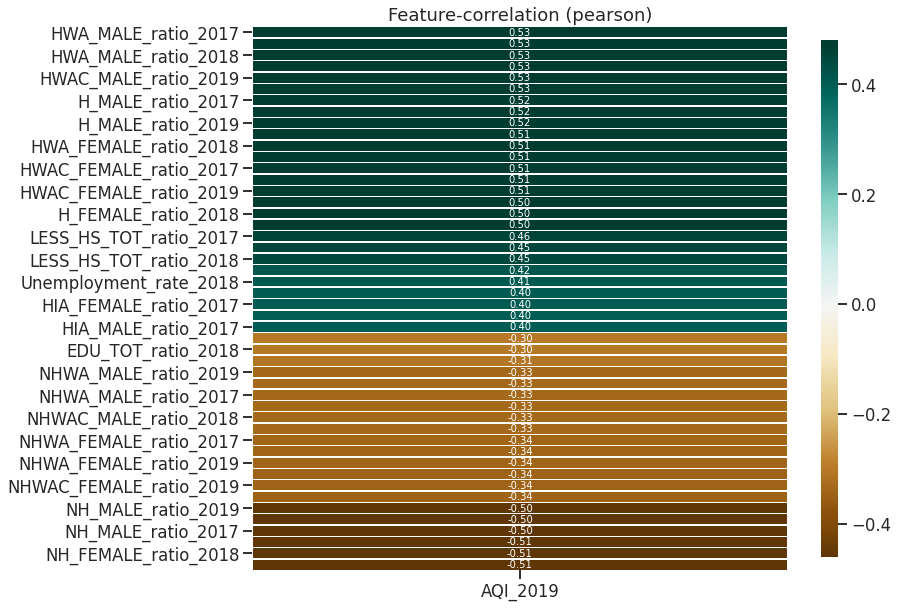

In [87]:
klib.corr_plot(top_r_features_2019, target='AQI_2019', method='pearson')

In [88]:
top_r_features_2019.corr()['AQI_2019'].head(10)

AQI_2019                1.000000
HWA_MALE_ratio_2017     0.530037
HWA_MALE_ratio_2019     0.529591
HWA_MALE_ratio_2018     0.529498
HWAC_MALE_ratio_2017    0.528633
HWAC_MALE_ratio_2019    0.527989
HWAC_MALE_ratio_2018    0.527966
H_MALE_ratio_2017       0.517582
H_MALE_ratio_2018       0.516624
H_MALE_ratio_2019       0.516536
Name: AQI_2019, dtype: float64

#perform difference of year columns and analyze relationship with 2019 aqi

In [89]:
# make variables storing lists of column names for respective years
df_17_columns = df.iloc[:, 3:190].columns.to_list()
df_18_columns = df.iloc[:, 190:377].columns.to_list()
df_19_columns = df.iloc[:, 378:565].columns.to_list()

In [90]:
df_18_17_diff = pd.DataFrame()
for col17, col18 in zip(df_17_columns, df_18_columns):
    df_18_17_diff[col18 + '_2017_diff'] = (df_2018[col18] - df_2017[col17])

df_18_17_diff


,Civilian_labor_force_2018_2017_diff,Employed_2018_2017_diff,Unemployed_2018_2017_diff,Unemployment_rate_2018_2017_diff,"Poverty Estimate, All Ages_2018_2017_diff",90% CI LB All Ages_2018_2017_diff,90% CI UB All Ages_2018_2017_diff,"Poverty Percent, All Ages_2018_2017_diff",90% CI LB percent_2018_2017_diff,90% CI UB percent_2018_2017_diff,...,HWAC_MALE_ratio_2018_2017_diff,HWAC_FEMALE_ratio_2018_2017_diff,HBAC_MALE_ratio_2018_2017_diff,HBAC_FEMALE_ratio_2018_2017_diff,HIAC_MALE_ratio_2018_2017_diff,HIAC_FEMALE_ratio_2018_2017_diff,HAAC_MALE_ratio_2018_2017_diff,HAAC_FEMALE_ratio_2018_2017_diff,HNAC_MALE_ratio_2018_2017_diff,HNAC_FEMALE_ratio_2018_2017_diff
0,4312,6021,-1709,-0.6,-4148.0,-4526.0,-3770.0,-0.6,-0.6,-0.6,...,0.041419,0.053031,0.003228,0.011114,0.000773,0.004106,0.001824,0.001217,-0.001057,-0.000148
1,5003,5641,-638,-0.5,-2312.0,-2147.0,-2477.0,-0.9,-0.9,-0.9,...,0.063663,0.073625,-0.004813,0.013743,-0.001789,0.005248,-0.001872,-0.002504,-0.001923,-0.000545
2,-202,227,-429,-0.4,-2748.0,-2585.0,-2911.0,-1.2,-1.1,-1.3,...,0.016532,0.030951,0.004471,0.015921,0.003860,-0.002712,0.001918,-0.002055,-0.001181,-0.003386
3,130,211,-81,-0.4,3009.0,3302.0,2716.0,4.2,4.7,3.7,...,-0.000567,0.028297,0.001249,0.001238,0.046278,0.064293,0.005475,-0.000109,-0.000022,0.005562
4,155,159,-4,0.0,-946.0,-599.0,-1293.0,-1.0,-0.7,-1.3,...,-0.051624,-0.006473,-0.000919,0.001562,-0.010325,0.015490,-0.009073,0.014561,0.000288,0.003561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-466,-322,-144,-0.3,282.0,73.0,491.0,0.3,0.0,0.6,...,0.080537,0.049459,0.010129,0.002177,-0.005831,0.010160,-0.001168,0.001105,-0.001152,0.004541
204,-6690,-4550,-2140,-0.4,-696.0,-987.0,-405.0,0.0,0.0,0.0,...,0.180475,0.202812,0.011645,0.016339,0.006646,0.006764,0.001300,0.000374,0.002278,0.001221
205,-481,71,-552,-0.3,847.0,673.0,1021.0,0.2,0.1,0.3,...,0.029369,0.049266,0.003916,0.003354,0.002928,0.004412,0.001115,0.001370,-0.001794,-0.000289
206,-40,-75,35,0.1,-455.0,-555.0,-355.0,-0.6,-0.7,-0.5,...,-0.047315,0.053643,0.010833,0.008881,-0.013264,-0.012212,0.024725,0.010569,-0.000221,0.003905


In [91]:
df_19_17_diff = pd.DataFrame()
for col17, col19 in zip(df_17_columns, df_19_columns):
    df_19_17_diff[col19 + '_2017_diff'] = (df_2019[col19] - df_2017[col17])

df_19_17_diff

,Civilian_labor_force_2019_2017_diff,Employed_2019_2017_diff,Unemployed_2019_2017_diff,Unemployment_rate_2019_2017_diff,"Poverty Estimate, All Ages_2019_2017_diff",90% CI LB All Ages_2019_2017_diff,90% CI UB All Ages_2019_2017_diff,"Poverty Percent, All Ages_2019_2017_diff",90% CI LB percent_2019_2017_diff,90% CI UB percent_2019_2017_diff,...,HWAC_MALE_ratio_2019_2017_diff,HWAC_FEMALE_ratio_2019_2017_diff,HBAC_MALE_ratio_2019_2017_diff,HBAC_FEMALE_ratio_2019_2017_diff,HIAC_MALE_ratio_2019_2017_diff,HIAC_FEMALE_ratio_2019_2017_diff,HAAC_MALE_ratio_2019_2017_diff,HAAC_FEMALE_ratio_2019_2017_diff,HNAC_MALE_ratio_2019_2017_diff,HNAC_FEMALE_ratio_2019_2017_diff
0,7274,11437,-4163,-1.4,-3464.0,-4068.0,-2860.0,-0.5,-0.6,-0.4,...,0.091240,0.105122,0.008920,0.018489,0.003884,0.007815,0.004126,0.000628,-0.000124,0.000173
1,8657,10794,-2137,-1.4,-3190.0,-2933.0,-3447.0,-1.3,-1.2,-1.4,...,0.114356,0.137006,0.004812,0.018512,-0.002368,0.010170,-0.004820,0.007065,-0.000603,-0.002179
2,-378,962,-1340,-1.2,-12047.0,-12462.0,-11632.0,-5.5,-5.7,-5.3,...,0.055066,0.074771,0.004052,0.034047,0.004310,-0.008002,-0.002493,-0.001169,-0.001619,-0.002058
3,126,194,-68,-0.3,254.0,5.0,503.0,0.3,0.0,0.6,...,0.100015,0.055911,0.006689,-0.005850,0.083023,0.041091,-0.001577,0.005365,0.004133,0.006929
4,1267,1103,164,0.2,953.0,1372.0,534.0,0.5,0.9,0.1,...,0.097184,0.018564,-0.001507,-0.020492,0.003527,0.007047,0.006851,0.011549,0.002288,-0.004785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-886,-918,32,0.1,-489.0,-494.0,-484.0,-0.6,-0.7,-0.5,...,0.103126,0.129011,0.014676,0.009003,-0.003560,0.010156,0.005661,0.002242,-0.000014,0.002263
204,-8234,-7774,-460,0.0,-21312.0,-21843.0,-20781.0,-2.2,-2.2,-2.2,...,0.291356,0.308787,0.020634,0.029370,0.009071,0.008983,0.001185,0.001007,0.002622,0.001246
205,-1424,-1485,61,0.0,-175.0,-537.0,187.0,-0.1,-0.2,0.0,...,0.077000,0.098577,0.007541,0.006174,0.010770,0.009026,0.004939,0.007178,-0.001102,0.002145
206,261,341,-80,-0.1,-100.0,7.0,-207.0,-0.2,-0.1,-0.3,...,0.001977,0.187377,0.005057,0.021298,-0.009912,-0.019871,0.021831,0.012797,0.008540,0.016764


In [92]:
df_19_18_diff = pd.DataFrame()
for col18, col19 in zip(df_18_columns, df_19_columns):
    df_19_18_diff[col19 + '_2018_diff'] = (df_2019[col19] - df_2018[col18])

df_19_18_diff

,Civilian_labor_force_2019_2018_diff,Employed_2019_2018_diff,Unemployed_2019_2018_diff,Unemployment_rate_2019_2018_diff,"Poverty Estimate, All Ages_2019_2018_diff",90% CI LB All Ages_2019_2018_diff,90% CI UB All Ages_2019_2018_diff,"Poverty Percent, All Ages_2019_2018_diff",90% CI LB percent_2019_2018_diff,90% CI UB percent_2019_2018_diff,...,HWAC_MALE_ratio_2019_2018_diff,HWAC_FEMALE_ratio_2019_2018_diff,HBAC_MALE_ratio_2019_2018_diff,HBAC_FEMALE_ratio_2019_2018_diff,HIAC_MALE_ratio_2019_2018_diff,HIAC_FEMALE_ratio_2019_2018_diff,HAAC_MALE_ratio_2019_2018_diff,HAAC_FEMALE_ratio_2019_2018_diff,HNAC_MALE_ratio_2019_2018_diff,HNAC_FEMALE_ratio_2019_2018_diff
0,2962,5416,-2454,-0.8,684.0,458.0,910.0,0.1,0.0,0.2,...,0.049821,0.052091,0.005691,0.007374,0.003112,0.003709,0.002302,-0.000589,0.000933,0.000321
1,3654,5153,-1499,-0.9,-878.0,-786.0,-970.0,-0.4,-0.3,-0.5,...,0.050694,0.063381,0.009625,0.004769,-0.000580,0.004921,-0.002948,0.009569,0.001320,-0.001634
2,-176,735,-911,-0.8,-9299.0,-9877.0,-8721.0,-4.3,-4.6,-4.0,...,0.038534,0.043819,-0.000419,0.018125,0.000450,-0.005290,-0.004412,0.000886,-0.000438,0.001328
3,-4,-17,13,0.1,-2755.0,-3297.0,-2213.0,-3.9,-4.7,-3.1,...,0.100582,0.027614,0.005440,-0.007088,0.036745,-0.023202,-0.007052,0.005474,0.004155,0.001367
4,1112,944,168,0.2,1899.0,1971.0,1827.0,1.5,1.6,1.4,...,0.148808,0.025037,-0.000588,-0.022055,0.013852,-0.008442,0.015924,-0.003012,0.002000,-0.008345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-420,-596,176,0.4,-771.0,-567.0,-975.0,-0.9,-0.7,-1.1,...,0.022589,0.079551,0.004548,0.006826,0.002271,-0.000005,0.006829,0.001137,0.001138,-0.002278
204,-1544,-3224,1680,0.4,-20616.0,-20856.0,-20376.0,-2.2,-2.2,-2.2,...,0.110881,0.105975,0.008989,0.013032,0.002425,0.002219,-0.000115,0.000633,0.000344,0.000025
205,-943,-1556,613,0.3,-1022.0,-1210.0,-834.0,-0.3,-0.3,-0.3,...,0.047631,0.049311,0.003626,0.002820,0.007842,0.004613,0.003824,0.005808,0.000693,0.002434
206,301,416,-115,-0.2,355.0,562.0,148.0,0.4,0.6,0.2,...,0.049293,0.133734,-0.005776,0.012418,0.003351,-0.007659,-0.002894,0.002228,0.008761,0.012859


In [93]:
# geoFIPS = df_2017['GeoFIPS']
#
# df_18_17_diff['GeoFIPS'] = geoFIPS
# df_19_18_diff['GeoFIPS'] = geoFIPS

In [94]:
df_diff = pd.concat([df_18_17_diff, df_19_17_diff, df_19_18_diff], axis=1)
# df_diff = pd.merge(df_18_17_diff, df_19_18_diff)
df_diff.insert(loc=0, column='AQI_2019', value=df_2019['AQI_2019'])
df_diff

,GeoFIPS,AQI_2019,Civilian_labor_force_2018_2017_diff,Employed_2018_2017_diff,Unemployed_2018_2017_diff,Unemployment_rate_2018_2017_diff,"Poverty Estimate, All Ages_2018_2017_diff",90% CI LB All Ages_2018_2017_diff,90% CI UB All Ages_2018_2017_diff,"Poverty Percent, All Ages_2018_2017_diff",...,HWAC_MALE_ratio_2019_2018_diff,HWAC_FEMALE_ratio_2019_2018_diff,HBAC_MALE_ratio_2019_2018_diff,HBAC_FEMALE_ratio_2019_2018_diff,HIAC_MALE_ratio_2019_2018_diff,HIAC_FEMALE_ratio_2019_2018_diff,HAAC_MALE_ratio_2019_2018_diff,HAAC_FEMALE_ratio_2019_2018_diff,HNAC_MALE_ratio_2019_2018_diff,HNAC_FEMALE_ratio_2019_2018_diff
0,1073,20.073389,4312,6021,-1709,-0.6,-4148.0,-4526.0,-3770.0,-0.6,...,0.049821,0.052091,0.005691,0.007374,0.003112,0.003709,0.002302,-0.000589,0.000933,0.000321
1,1089,12.958515,5003,5641,-638,-0.5,-2312.0,-2147.0,-2477.0,-0.9,...,0.050694,0.063381,0.009625,0.004769,-0.000580,0.004921,-0.002948,0.009569,0.001320,-0.001634
2,1101,13.125000,-202,227,-429,-0.4,-2748.0,-2585.0,-2911.0,-1.2,...,0.038534,0.043819,-0.000419,0.018125,0.000450,-0.005290,-0.004412,0.000886,-0.000438,0.001328
3,4001,11.247911,130,211,-81,-0.4,3009.0,3302.0,2716.0,4.2,...,0.100582,0.027614,0.005440,-0.007088,0.036745,-0.023202,-0.007052,0.005474,0.004155,0.001367
4,4003,17.413408,155,159,-4,0.0,-946.0,-599.0,-1293.0,-1.0,...,0.148808,0.025037,-0.000588,-0.022055,0.013852,-0.008442,0.015924,-0.003012,0.002000,-0.008345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,55027,10.503937,-466,-322,-144,-0.3,282.0,73.0,491.0,0.3,...,0.022589,0.079551,0.004548,0.006826,0.002271,-0.000005,0.006829,0.001137,0.001138,-0.002278
204,55079,14.431990,-6690,-4550,-2140,-0.4,-696.0,-987.0,-405.0,0.0,...,0.110881,0.105975,0.008989,0.013032,0.002425,0.002219,-0.000115,0.000633,0.000344,0.000025
205,55133,15.656425,-481,71,-552,-0.3,847.0,673.0,1021.0,0.2,...,0.047631,0.049311,0.003626,0.002820,0.007842,0.004613,0.003824,0.005808,0.000693,0.002434
206,56021,13.354142,-40,-75,35,0.1,-455.0,-555.0,-355.0,-0.6,...,0.049293,0.133734,-0.005776,0.012418,0.003351,-0.007659,-0.002894,0.002228,0.008761,0.012859


In [95]:
df_diff.columns.tolist()


['GeoFIPS',
 'AQI_2019',
 'Civilian_labor_force_2018_2017_diff',
 'Employed_2018_2017_diff',
 'Unemployed_2018_2017_diff',
 'Unemployment_rate_2018_2017_diff',
 'Poverty Estimate, All Ages_2018_2017_diff',
 '90% CI LB All Ages_2018_2017_diff',
 '90% CI UB All Ages_2018_2017_diff',
 'Poverty Percent, All Ages_2018_2017_diff',
 '90% CI LB percent_2018_2017_diff',
 '90% CI UB percent_2018_2017_diff',
 'Poverty Estimate, Age 0-17_2018_2017_diff',
 '90% CI LB percent 0-17_2018_2017_diff',
 '90% CI UB 0-17_2018_2017_diff',
 'Poverty Percent, Age 0-17_2018_2017_diff',
 '90% CI LB percent 0-17 percent_2018_2017_diff',
 '90% CI UB 0-17 percent_2018_2017_diff',
 'Poverty Estimate, Age 5-17 in Families_2018_2017_diff',
 '90% CI LB 5-17 fam_2018_2017_diff',
 '90% CI UB 5-17 fam_2018_2017_diff',
 'Poverty Percent, Age 5-17 in Families_2018_2017_diff',
 '90% CI LB 5-17 percent_2018_2017_diff',
 '90% CI UB percent 5-17 percent_2018_2017_diff',
 'Median Household Income_2018_2017_diff',
 '90% CI Lower

In [99]:
# right here using corr() to find r values of dataset on AQI feature
# make a list a that contains r values features greater than 0.2 and less than -0.2
# Use that list to retain a dataframe with those attributes to explore; rather than exploring all unnecessary columns

corr_diff = list(zip(df_diff.corr()['AQI_2019'].sort_values(ascending=False).index.tolist(), df_diff.corr()['AQI_2019'].sort_values(ascending=False).values.tolist()))
r_feat_diff = [feature[0] for feature in corr_diff if feature[1] >= 0.2 or feature[1] <= -0.2]
top_r_features_diff = df_diff[r_feat_diff]
display(top_r_features_diff)

,AQI_2019,HAA_MALE_ratio_2019_2018_diff,HAAC_MALE_ratio_2019_2017_diff,HAA_MALE_ratio_2019_2017_diff,HAA_MALE_2019_2018_diff,HIA_FEMALE_2019_2018_diff,HIAC_FEMALE_2019_2018_diff,HIA_MALE_2019_2018_diff,HIAC_MALE_2019_2018_diff,HAAC_MALE_2019_2018_diff,...,90% CI UB 0-17_2019_2018_diff,90% CI LB All Ages_2019_2018_diff,"Poverty Estimate, Age 0-17_2019_2018_diff",90% CI LB percent 0-17_2019_2018_diff,TOT_FEMALE_ratio_2018_2017_diff,90% CI UB 5-17 fam_2019_2018_diff,TOT_FEMALE_ratio_2019_2017_diff,"Poverty Estimate, Age 5-17 in Families_2019_2018_diff",90% CI LB 5-17 fam_2019_2018_diff,GeoFIPS
0,20.073389,0.001227,0.004126,0.002594,8,14,24,-10,20,15,...,128.0,458.0,-124.0,-376.0,0.019808,-279.0,0.022760,-307.0,-335.0,1073
1,12.958515,-0.001258,-0.004820,-0.001981,-4,8,24,-7,4,-9,...,-25.0,-786.0,67.0,159.0,-0.005348,-256.0,-0.060181,-266.0,-276.0,1089
2,13.125000,0.000885,-0.002493,0.000067,2,-4,-12,5,1,-10,...,-3587.0,-9877.0,-4095.0,-4603.0,0.035381,-2513.0,0.180431,-2802.0,-3091.0,1101
3,11.247911,-0.000051,-0.001577,0.006876,0,-20,-15,13,28,-5,...,-330.0,-3297.0,-557.0,-784.0,0.168415,502.0,-0.000273,353.0,204.0,4001
4,17.413408,0.002806,0.006851,0.002255,3,3,-14,14,14,19,...,774.0,1971.0,836.0,898.0,-0.037888,183.0,0.053409,236.0,289.0,4003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,10.503937,0.002276,0.005661,0.002258,2,3,0,-4,2,6,...,-246.0,-567.0,-242.0,-238.0,-0.012916,-91.0,0.053309,-89.0,-87.0,55027
204,14.431990,-0.000792,0.001185,0.000715,-8,13,17,21,19,-2,...,-7350.0,-20856.0,-7668.0,-7986.0,-0.017496,-2459.0,0.007248,-2473.0,-2487.0,55079
205,15.656425,-0.000568,0.004939,0.000109,-2,7,20,24,33,16,...,327.0,-1210.0,348.0,369.0,-0.018644,284.0,-0.038357,262.0,240.0,55133
206,13.354142,-0.005542,0.021831,0.012354,-5,-10,-5,2,6,-2,...,-354.0,562.0,-369.0,-384.0,0.041256,-263.0,0.109764,-300.0,-337.0,56021


(208, 88)

In [97]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(top_r_features_diff.corr()['AQI_2019'])

AQI_2019                                                 1.000000
HAA_MALE_ratio_2019_2018_diff                            0.405938
HAAC_MALE_ratio_2019_2017_diff                           0.360129
HAA_MALE_ratio_2019_2017_diff                            0.349482
HAA_MALE_2019_2018_diff                                  0.326487
HIA_FEMALE_2019_2018_diff                                0.317993
HIAC_FEMALE_2019_2018_diff                               0.308301
HIA_MALE_2019_2018_diff                                  0.306801
HIAC_MALE_2019_2018_diff                                 0.304698
HAAC_MALE_2019_2018_diff                                 0.301281
HIA_FEMALE_2019_2017_diff                                0.298098
HAA_MALE_2019_2017_diff                                  0.296371
HAAC_MALE_2019_2017_diff                                 0.295670
HIA_MALE_2019_2017_diff                                  0.290828
HIAC_MALE_2019_2017_diff                                 0.289161
HAA_FEMALE

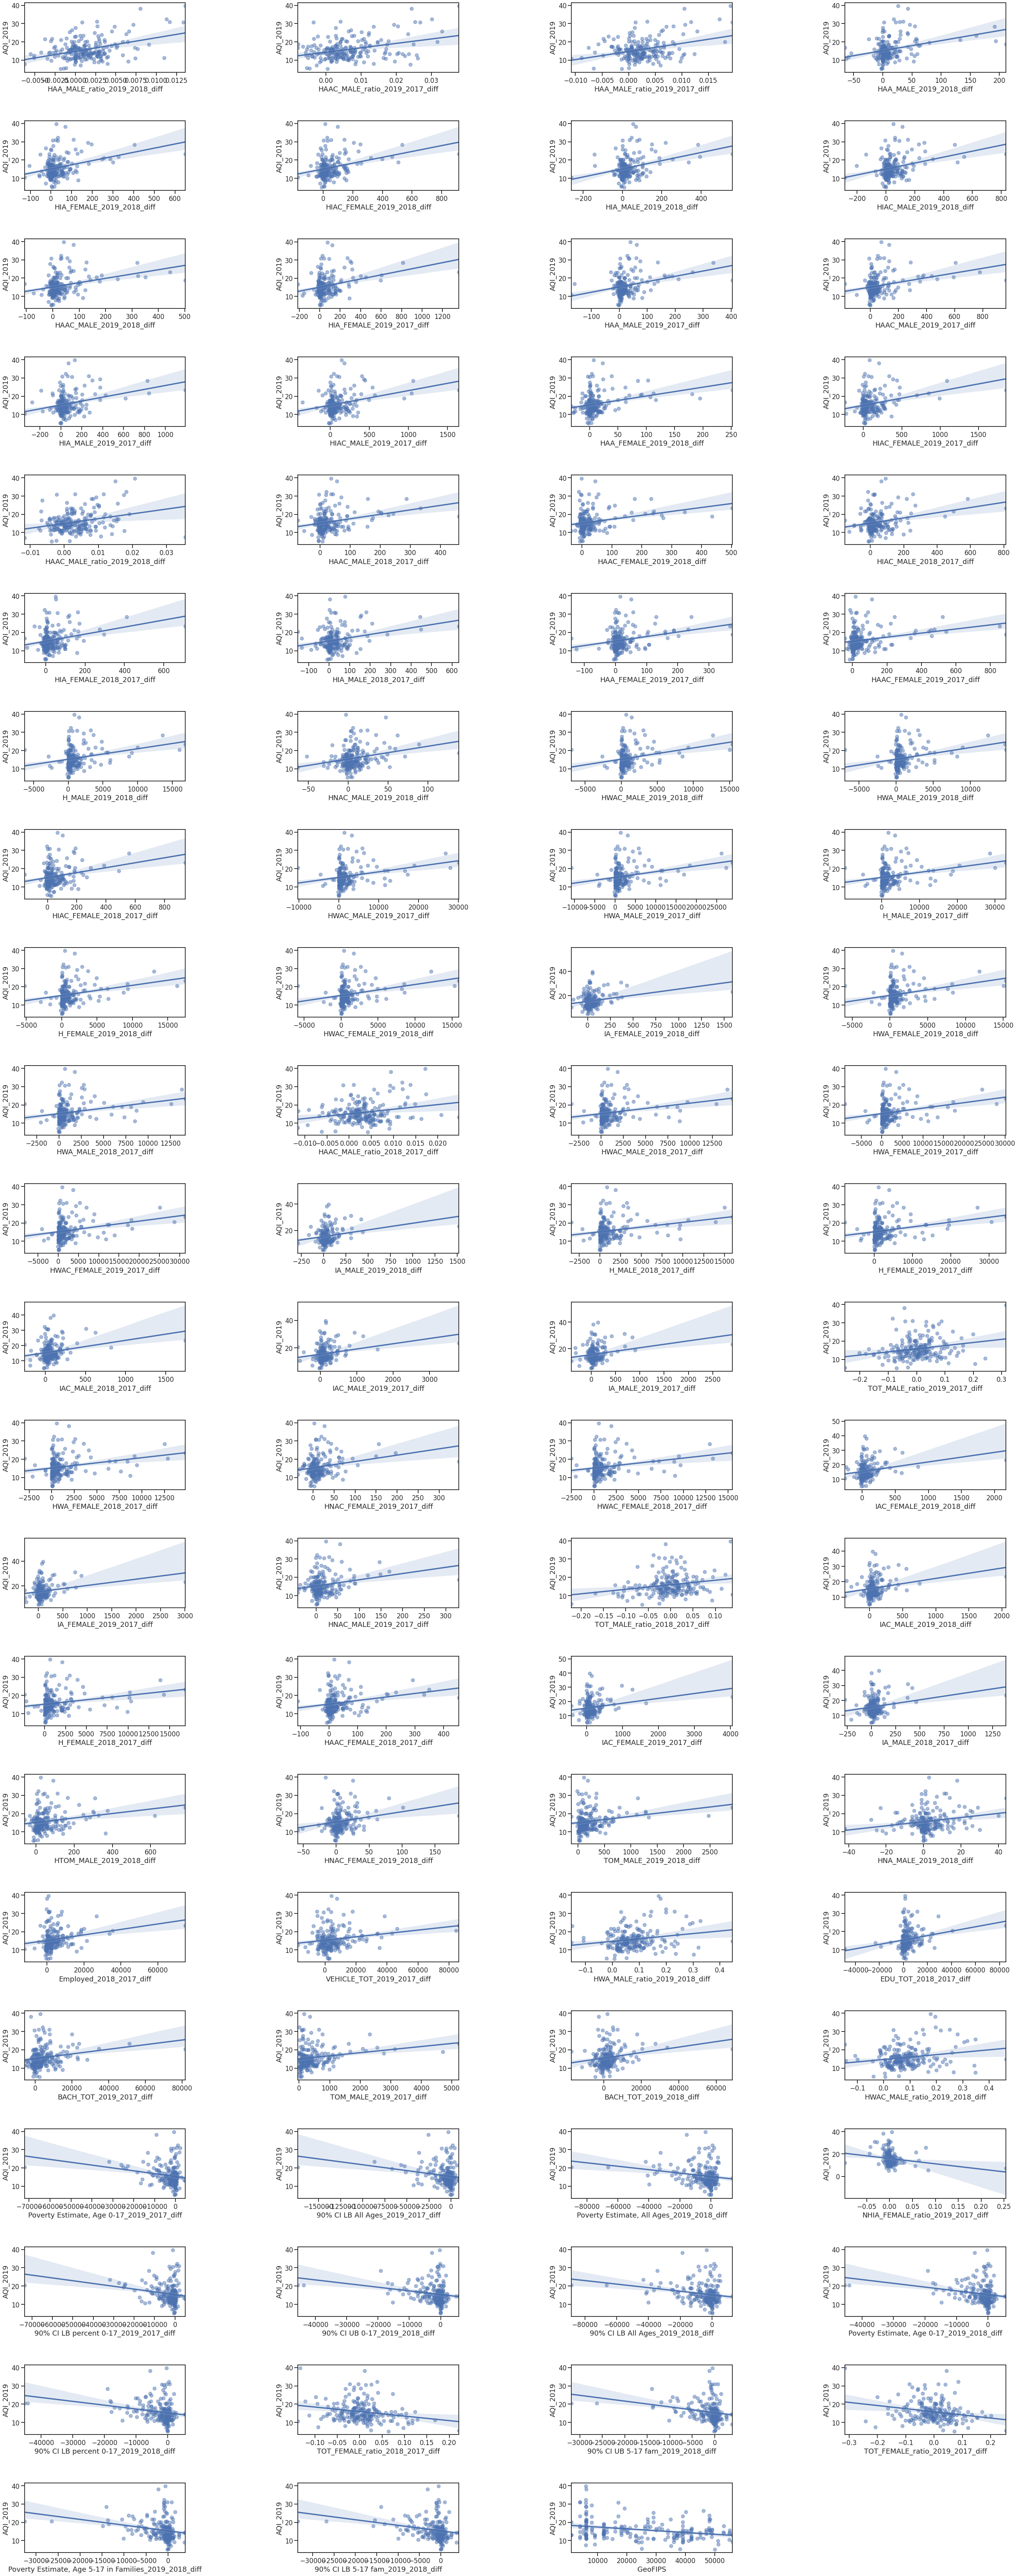

In [101]:
scatterplots(df_diff, 'AQI_2019', r_feat_diff[1:], ncol=4, figsize=(45,120))

In [102]:
display(top_r_features_diff.corr()['AQI_2019'].head(10))
display(top_r_features_diff.corr()['AQI_2019'].tail(10))


AQI_2019                          1.000000
HAA_MALE_ratio_2019_2018_diff     0.405938
HAAC_MALE_ratio_2019_2017_diff    0.360129
HAA_MALE_ratio_2019_2017_diff     0.349482
HAA_MALE_2019_2018_diff           0.326487
HIA_FEMALE_2019_2018_diff         0.317993
HIAC_FEMALE_2019_2018_diff        0.308301
HIA_MALE_2019_2018_diff           0.306801
HIAC_MALE_2019_2018_diff          0.304698
HAAC_MALE_2019_2018_diff          0.301281
Name: AQI_2019, dtype: float64

90% CI UB 0-17_2019_2018_diff                           -0.206815
90% CI LB All Ages_2019_2018_diff                       -0.209890
Poverty Estimate, Age 0-17_2019_2018_diff               -0.215930
90% CI LB percent 0-17_2019_2018_diff                   -0.223690
TOT_FEMALE_ratio_2018_2017_diff                         -0.224817
90% CI UB 5-17 fam_2019_2018_diff                       -0.229922
TOT_FEMALE_ratio_2019_2017_diff                         -0.231561
Poverty Estimate, Age 5-17 in Families_2019_2018_diff   -0.233551
90% CI LB 5-17 fam_2019_2018_diff                       -0.235452
GeoFIPS                                                 -0.294129
Name: AQI_2019, dtype: float64

In [98]:
# save datasets
pm10_2017_2019 = r'../../data/processed/pm10_2017_2019'
df.to_csv(pm10_2017_2019, index=False)

pm10_year_diffs = r'../../data/processed/pm10_year_diffs'
df_diff.to_csv(pm10_year_diffs, index=False)

# .to_csv(data_path, index=False)